In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import statsmodels.api as sm

In [2]:
df = pd.read_csv('height-weight.csv')

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


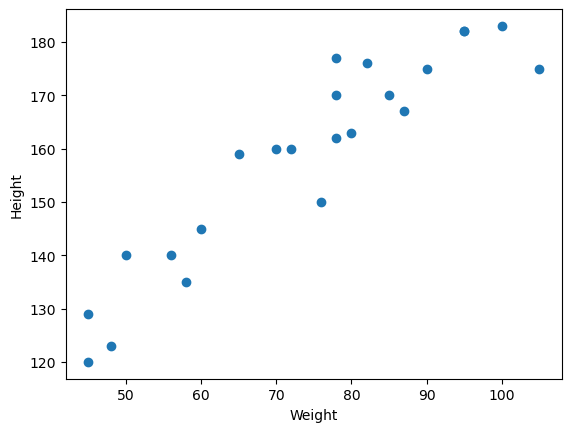

In [4]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [5]:
# Correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


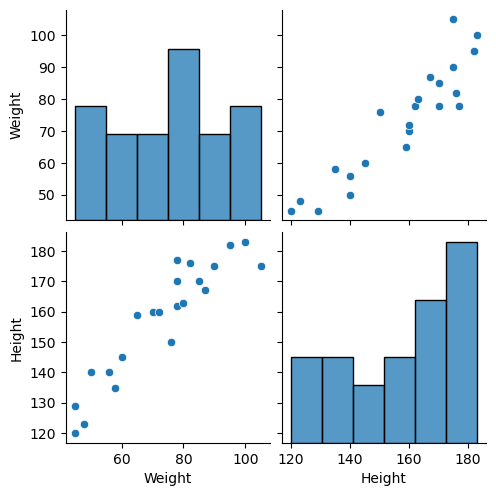

In [6]:
sns.pairplot(df)
plt.show()

In [23]:
# Independent and dependent features
X = df[['Weight']] # Independent features should be a data frame or 2 dimensional array
y = df['Height'] # Dependent feature can be series or 1D array

In [25]:
X_series = df['Weight']

In [29]:
# Train Test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [31]:
X_train.shape

(17, 1)

In [33]:
y_train.shape

(17,)

In [37]:
# Standardization
scaler = StandardScaler()

In [41]:
X_train = scaler.fit_transform(X_train)

In [43]:
X_test = scaler.transform(X_test)

In [51]:
# Apply linear regression
regression = LinearRegression()

In [57]:
regression.fit(X_train,y_train)

LinearRegression()

In [63]:
print("Coefficient or Slope",regression.coef_)
print("Intercept",regression.intercept_)

Coefficient or Slope [17.2982057]
Intercept 156.47058823529412


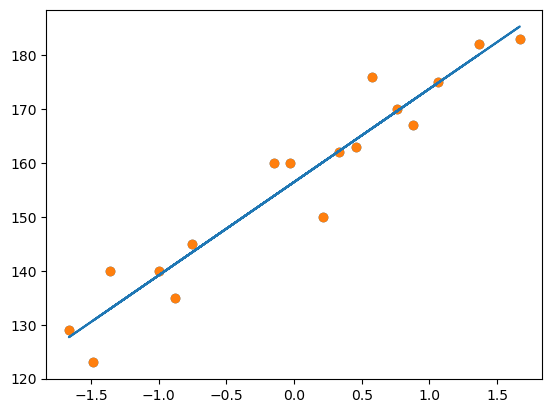

In [73]:
## Plot best fit line using training data 
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))
plt.show()

In [93]:
# Prediction for test data 
## predicted height output = intercept + coeff(Weight)

y_pred = regression.predict(X_test)


In [95]:
# Performance Metrics
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.665125886795005
10.716374991212605


In [97]:
# R-squared
score = r2_score(y_test,y_pred)
print(score)

0.7360826717981276


In [99]:
# adjusted R-squarded
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6701033397476595

In [105]:
# OLS linear regression
model = sm.OLS(y_train,X_train).fit()

In [107]:
prediction = model.predict(X_test)
print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [109]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Thu, 01 May 2025   Prob (F-statistic):                       0.664
Time:                        08:42:52   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


In [116]:
# predicion for new data
regression.predict(scaler.transform([[72]]))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])